# How to use GCRCatalogs

by Yao-Yuan Mao

Links to GitHub code repos: [GCRCatalogs](https://github.com/LSSTDESC/gcr-catalogs) and [GCR](https://github.com/yymao/generic-catalog-reader)

**Note: You should be running this notebook at https://jupyter-dev.nersc.gov **

In [1]:
import sys
sys.path.insert(0, '..')

## The basics:

- `get_available_catalogs()` lists available catlaogs; returns `dict`.
- `load_catalog()` loads the catalog you want; returns an instance of `GCR.BaseGenericCatalog`

In [2]:
import GCRCatalogs

## check version
print('GCRCatalogs =', GCRCatalogs.__version__, '|' ,'GCR =', GCRCatalogs.GCR.__version__)

GCRCatalogs = 0.6.6 | GCR = 0.6.2


In [3]:
## list all find available catlaogs, sorted by their name

print('\n'.join(sorted(GCRCatalogs.get_available_catalogs())))

buzzard
buzzard_high-res
buzzard_test
ezmock_elg
ezmock_lrg
mxxl_bgs


In [4]:
## load 'buzzard_test' catalog

gc = GCRCatalogs.load_catalog('buzzard_test')

## GCR interface

See also the [full GCR API Documentation](https://yymao.github.io/generic-catalog-reader/index.html).

### quantities

- `get_quantities()` loads the quantities you need; takes a `list` and returns `dict`.
- `has_quantity()` and `has_quantities()` can check if the quantities you need exist; both return `bool`.
- `list_all_quantities()` lists all available catlaogs; returns `list`.

In [5]:
print(', '.join(gc.list_all_quantities()))

is_central, mag_r_des, galaxy_id, ellipticity_1_true, ellipticity_2_true, Mag_true_Y_des_z01, shear_2, mag_i_des, magerr_Y_des, Mag_true_i_des_z01, Mag_true_g_des_z01, is_BGS, Mag_true_r_des_z01, ellipticity_1, halo_id, is_QSO, dec, shear_1, mag_lensed_W1_wise, velocity_y, magerr_r_des, magnification, mag_lensed_W2_wise, mag_lensed_W4_wise, mag_g_des, Mag_true_z_des_z01, magerr_i_des, velocity_x, ra, ra_true, velocity_z, position_z, Mag_true_W4_wise_z01, magerr_g_des, convergence, mag_true_W1_wise, halo_mass, size, dec_true, mag_true_W2_wise, mag_z_des, is_LRG, position_y, mag_true_W4_wise, mag_lensed_W3_wise, is_ELG, ellipticity_2, Mag_true_W1_wise_z01, Mag_true_W2_wise_z01, mag_true_W3_wise, redshift, position_x, redshift_true, Mag_true_W3_wise_z01, mag_Y_des, size_true, magerr_z_des


In [9]:
gc.get_quantities(['mag_i_des', 'ra', 'dec'])

{'mag_i_des': array([22.17108 , 20.052048, 23.610605, ..., 23.847887, 22.968401,
        23.899775], dtype=float32),
 'dec': array([3.82566153, 3.82081084, 3.82521378, ..., 2.63239094, 2.50292078,
        3.92154459]),
 'ra': array([221.7452088 , 221.74582649, 221.74894922, ..., 222.41438104,
        222.78405324, 225.93821218])}

In [10]:
gc.has_quantity('mag_i_des')

True

In [11]:
gc.has_quantities(['mag_u_des', 'ra', 'dec'])

False

In [12]:
## Only returns `True` if *all* quantities exist
gc.has_quantities(['mag_u_des', 'ra', 'dec', 'quantitiy_that_does_not_exist'])

False

In [32]:
gc['is_BGS']

array([False, False, False, ..., False, False, False])

### accessing native quantities

Native quantities are quantities that have not yet be homogenized (to common labels/units).
However, you can still access them as long as you know what you are doing. 

In [13]:
## print out the first 5 native quantities

print('\n'.join(sorted(gc.list_all_native_quantities()[:5])))

truth/AMAG_WISE/2
truth/FLUX/0
truth/IVAR/0
truth/SIGMA5P
truth/TMAG_WISE/2


In [14]:
gc.get_quantities(['truth/AMAG/0',
                   'truth/AMAG/3'])

{'truth/AMAG/3': array([-18.465008, -20.536036, -16.91503 , ..., -21.400494, -21.089745,
        -21.239622], dtype=float32),
 'truth/AMAG/0': array([-17.522438, -19.70175 , -16.09822 , ..., -20.893204, -21.188713,
        -20.857277], dtype=float32)}

You can also rename the native quantities by using `add_quantity_modifier()`. For example:

In [15]:
gc.add_quantity_modifier('kcorrect_coefficient_0', 'truth/COEFFS/0')
gc.get_quantities(['kcorrect_coefficient_0'])

{'kcorrect_coefficient_0': array([8.9925282e-11, 4.9798619e-08, 1.0353722e-08, ..., 7.9368210e-09,
        5.1256954e-09, 5.5366587e-09], dtype=float32)}

To get all native quantities that match a regex

In [16]:
import re

data = gc.get_quantities([q for q in gc.list_all_native_quantities() if re.match('truth/COEFFS/\d+', q)]) 

In [17]:
data

{'truth/COEFFS/2': array([1.7087199e-08, 6.9610699e-08, 4.9755289e-09, ..., 2.9169820e-09,
        3.3344933e-09, 3.1452738e-09], dtype=float32),
 'truth/COEFFS/4': array([4.3466626e-09, 7.7448703e-08, 1.7536517e-09, ..., 1.0927452e-09,
        1.9595995e-14, 5.3140570e-10], dtype=float32),
 'truth/COEFFS/0': array([8.9925282e-11, 4.9798619e-08, 1.0353722e-08, ..., 7.9368210e-09,
        5.1256954e-09, 5.5366587e-09], dtype=float32),
 'truth/COEFFS/3': array([1.3090353e-07, 6.9959231e-07, 5.6019429e-09, ..., 4.7609401e-09,
        4.7467079e-14, 1.0233453e-09], dtype=float32),
 'truth/COEFFS/1': array([3.0382059e-14, 9.5112503e-13, 4.1000224e-12, ..., 3.0571330e-11,
        8.2205368e-11, 2.9082922e-11], dtype=float32)}

### more info about the catalog

- `lightcone` is a `bool`
- `cosmology` is a instance of `astropy.cosmology.FLRW`
- `get_input_kwargs()` returns a `dict` (when no argument) from the orignal yaml config file. 
  If a argument if passed, it returns the corresponding value for key=argument

In [18]:
gc.lightcone

True

In [19]:
gc.cosmology

FlatLambdaCDM(H0=70 km / (Mpc s), Om0=0.286, Tcmb0=0 K, Neff=3.04, m_nu=None, Ob0=None)

In [20]:
print(gc.get_catalog_info('description'))

This is a smaller version of the Buzzard galaxy catalog v1.6 (realization 0),
with only one healpixel, for testing purposes.



In [21]:
print(gc.get_catalog_info('version'))

None


In [22]:
print(gc.get_catalog_info())

{'subclass_name': 'buzzard.BuzzardGalaxyCatalog', 'catalog_root_dir': '/project/projectdirs/desi/mocks/buzzard/buzzard_v1.6_desicut/8/', 'catalog_path_template': {'truth': '{group}/{pix}/Buzzard_v1.6_lensed-8-{pix}.fits'}, 'cosmology': {'H0': 70.0, 'Om0': 0.286}, 'healpix_pixels': [128], 'halo_mass_def': 'vir', 'lightcone': True, 'sky_area': 53.71, 'creators': ['Joe DeRose', 'Risa Wechsler', 'Eli Rykoff', 'Matt Becker'], 'description': 'This is a smaller version of the Buzzard galaxy catalog v1.6 (realization 0),\nwith only one healpixel, for testing purposes.\n'}


### more tips on using the quantities

#### tip 1
`get_quantities()` returns a dictionary, which you can easily turn into a `astropy.table.Table` or `pandas.DataFrame`

In [23]:
data = gc.get_quantities(['mag_g_des', 'ra', 'dec'])

In [24]:
import pandas as pd
pd.DataFrame(data)

,dec,mag_g_des,ra
0,3.825662,23.563454,221.745209
1,3.820811,21.204252,221.745826
2,3.825214,24.834717,221.748949
3,3.820247,22.417755,221.747757
4,7.494717,24.906065,223.650718
5,7.493139,20.587118,223.651473
6,3.822255,24.060648,221.741501
7,3.823763,25.392254,221.740025
8,3.826067,24.513468,221.752858
9,7.491235,24.395870,223.648755


In [25]:
from astropy.table import Table
Table(data)

dec,mag_g_des,ra
float64,float32,float64
3.8256615344934346,23.563454,221.7452087978323
3.820810840863899,21.204252,221.74582648919522
3.8252137807965596,24.834717,221.74894921552067
3.820247270462815,22.417755,221.7477565849563
7.494717366443041,24.906065,223.65071755221217
7.4931394784929495,20.587118,223.65147320174074
3.8222553340855114,24.060648,221.74150126760964
3.8237627519934563,25.392254,221.7400245737922
3.82606715024572,24.513468,221.75285791025044


#### tip 2

Sometimes you can allow slightly different quantiies (for example, lsst u band and sdss u band) when comparing different catalogs. In this case, you can use `first_available()` to get the first available of the given catalog.

In [26]:
gc.first_available('mag_g_des', 'mag_u_sdss', 'mag_u_lsst')

'mag_g_des'

### Here's a full example

In [27]:
import numpy as np
from astropy.table import Table
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
catalogs = ('buzzard_test',)
gc_all = dict(zip(catalogs, (GCRCatalogs.load_catalog(c) for c in catalogs)))

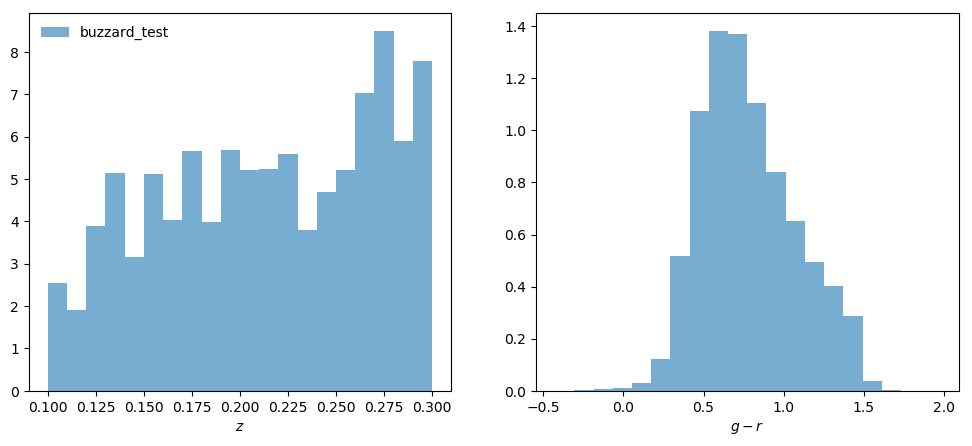

In [31]:
fig, ax = plt.subplots(ncols=2, figsize=(12,5), dpi=100)

for label, gc_this in gc_all.items():
    mag_g = gc_this.first_available('mag_g_des', 'mag_g_sdss')
    mag_r = gc_this.first_available('mag_r_des', 'mag_r_sdss')
    redshift = gc_this.first_available('redshift_true', 'redshift')
    quantities_needed = [mag_g, mag_r, redshift]
    
    data = Table(gc_this.get_quantities(quantities_needed, [redshift + '> 0.1', redshift + '< 0.3']))
    
    data = data[np.isfinite(data[mag_g]) & np.isfinite(data[mag_r])]
    data = data[data[mag_r] < 22.0]
    
    ax[0].hist(data[redshift], 20, density=True, alpha=0.6, label=label);
    ax[1].hist(data[mag_g] - data[mag_r], 20, density=True, alpha=0.6);

ax[0].legend(frameon=False);
ax[0].set_xlabel('$z$');
ax[1].set_xlabel('$g-r$');